In [23]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgbm
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgbm
from seaborn import *
import seaborn as sns; sns.set()
import ipywidgets as widgets
from scipy import stats

dataset = pd.read_csv(r'C:\Users\rohit\Desktop\MSc. Computer Science - Data Science\Machine Learning\Group project\datasets\data.csv')

In [24]:
dataset.head()

,year,Date,Month,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,application_type,purpose,interest_rate,grade,installment,region,loan_condition
0,2011,1,12,10.0,RENT,Low,24000,5000,36 months,INDIVIDUAL,credit_card,10.65,B,162.87,munster,Good Loan
1,2011,1,12,0.5,RENT,Low,30000,2500,60 months,INDIVIDUAL,car,15.27,C,59.83,leinster,Bad Loan
2,2011,1,12,10.0,RENT,Low,12252,2400,36 months,INDIVIDUAL,small_business,15.96,C,84.33,cannught,Good Loan
3,2011,1,12,10.0,RENT,Low,49200,10000,36 months,INDIVIDUAL,other,13.49,C,339.31,ulster,Good Loan
4,2011,1,12,1.0,RENT,Low,80000,3000,60 months,INDIVIDUAL,other,12.69,B,67.79,ulster,Good Loan


In [25]:
bad_loans = dataset[dataset['loan_condition'] == 'Bad Loan']
good_loans = dataset[dataset['loan_condition'] == 'Good Loan']

In [26]:
good_loans.describe()

,year,Date,Month,emp_length_int,annual_inc,loan_amount,interest_rate,installment
count,819950.000000,819950.0,819950.000000,819950.000000,8.199500e+05,819950.000000,819950.000000,819950.000000
mean,2014.081506,1.0,7.070487,6.066477,7.566104e+04,14746.769651,13.026273,435.728070
std,1.230828,0.0,3.383401,3.510085,6.464792e+04,8432.461686,4.313950,243.713874
min,2007.000000,1.0,1.000000,0.500000,0.000000e+00,500.000000,5.320000,15.670000
25%,2014.000000,1.0,4.000000,3.000000,4.600000e+04,8000.000000,9.760000,259.830000
50%,2014.000000,1.0,7.000000,6.050000,6.500000e+04,13000.000000,12.690000,381.600000
75%,2015.000000,1.0,10.000000,10.000000,9.000000e+04,20000.000000,15.610000,571.560000
max,2015.000000,1.0,12.000000,10.000000,9.500000e+06,35000.000000,28.990000,1445.460000


In [27]:
bad_loans.describe()

,year,Date,Month,emp_length_int,annual_inc,loan_amount,interest_rate,installment
count,67429.000000,67429.0,67429.000000,67429.000000,6.742900e+04,67429.000000,67429.000000,67429.000000
mean,2013.295244,1.0,6.450963,5.857064,6.732467e+04,14858.564935,15.927657,448.744260
std,1.399202,0.0,3.363225,3.468839,6.481291e+04,8471.158706,4.313284,249.551787
min,2007.000000,1.0,1.000000,0.500000,2.000000e+03,500.000000,5.320000,15.910000
25%,2013.000000,1.0,4.000000,3.000000,4.200000e+04,8325.000000,12.990000,270.480000
50%,2014.000000,1.0,7.000000,6.000000,5.800000e+04,13175.000000,15.610000,396.420000
75%,2014.000000,1.0,9.000000,10.000000,8.000000e+04,20000.000000,18.750000,581.400000
max,2015.000000,1.0,12.000000,10.000000,8.900060e+06,35000.000000,28.990000,1424.570000


In [28]:
bad_loans = bad_loans.iloc[0:10426,:]

In [29]:
good_loans = good_loans.iloc[0:23597,:]

In [30]:
dataset = good_loans.append(bad_loans)

In [31]:
dataset.describe()

,year,Date,Month,emp_length_int,annual_inc,loan_amount,interest_rate,installment
count,34023.000000,34023.0,34023.000000,34023.000000,3.402300e+04,34023.000000,34023.000000,34023.000000
mean,2010.925903,1.0,8.028187,5.343249,6.887591e+04,12069.246539,12.707087,344.257462
std,0.978762,0.0,3.355909,3.438766,5.047577e+04,7989.713078,4.273262,223.039702
min,2007.000000,1.0,1.000000,0.500000,2.000000e+03,500.000000,5.420000,15.910000
25%,2011.000000,1.0,6.000000,2.000000,4.151400e+04,6000.000000,9.760000,176.900000
50%,2011.000000,1.0,9.000000,5.000000,6.000000e+04,10000.000000,12.680000,301.410000
75%,2011.000000,1.0,11.000000,9.000000,8.287250e+04,16000.000000,15.620000,460.010000
max,2013.000000,1.0,12.000000,10.000000,1.900000e+06,35000.000000,26.060000,1408.130000


In [32]:
#dataset.to_csv('Loan_condition.csv', index=False)

In [36]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

Text(0.5,1,'Frequency of Loan Condition')

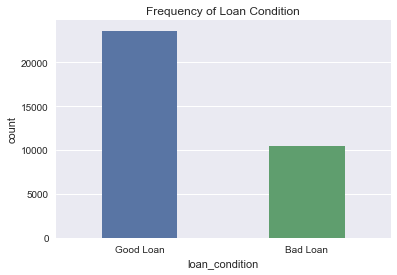

In [44]:
fig, ax = plt.subplots()
sns.countplot(x="loan_condition", data=dataset)
change_width(ax, 0.45)
plt.title('Frequency of Loan Condition')